In [1]:
import os
import itertools
from types import SimpleNamespace
import numpy
import matplotlib.pyplot as pyplot
from scipy.interpolate import make_interp_spline
from scipy import signal
import LocalModule

In [2]:
DsetDirs, FileTags = LocalModule.lb_noadv_contour_dict()
Datasets = dict()
for key in DsetDirs:
    Datasets[key] = LocalModule.read_datasets(DsetDirs[key], FileTags[key])

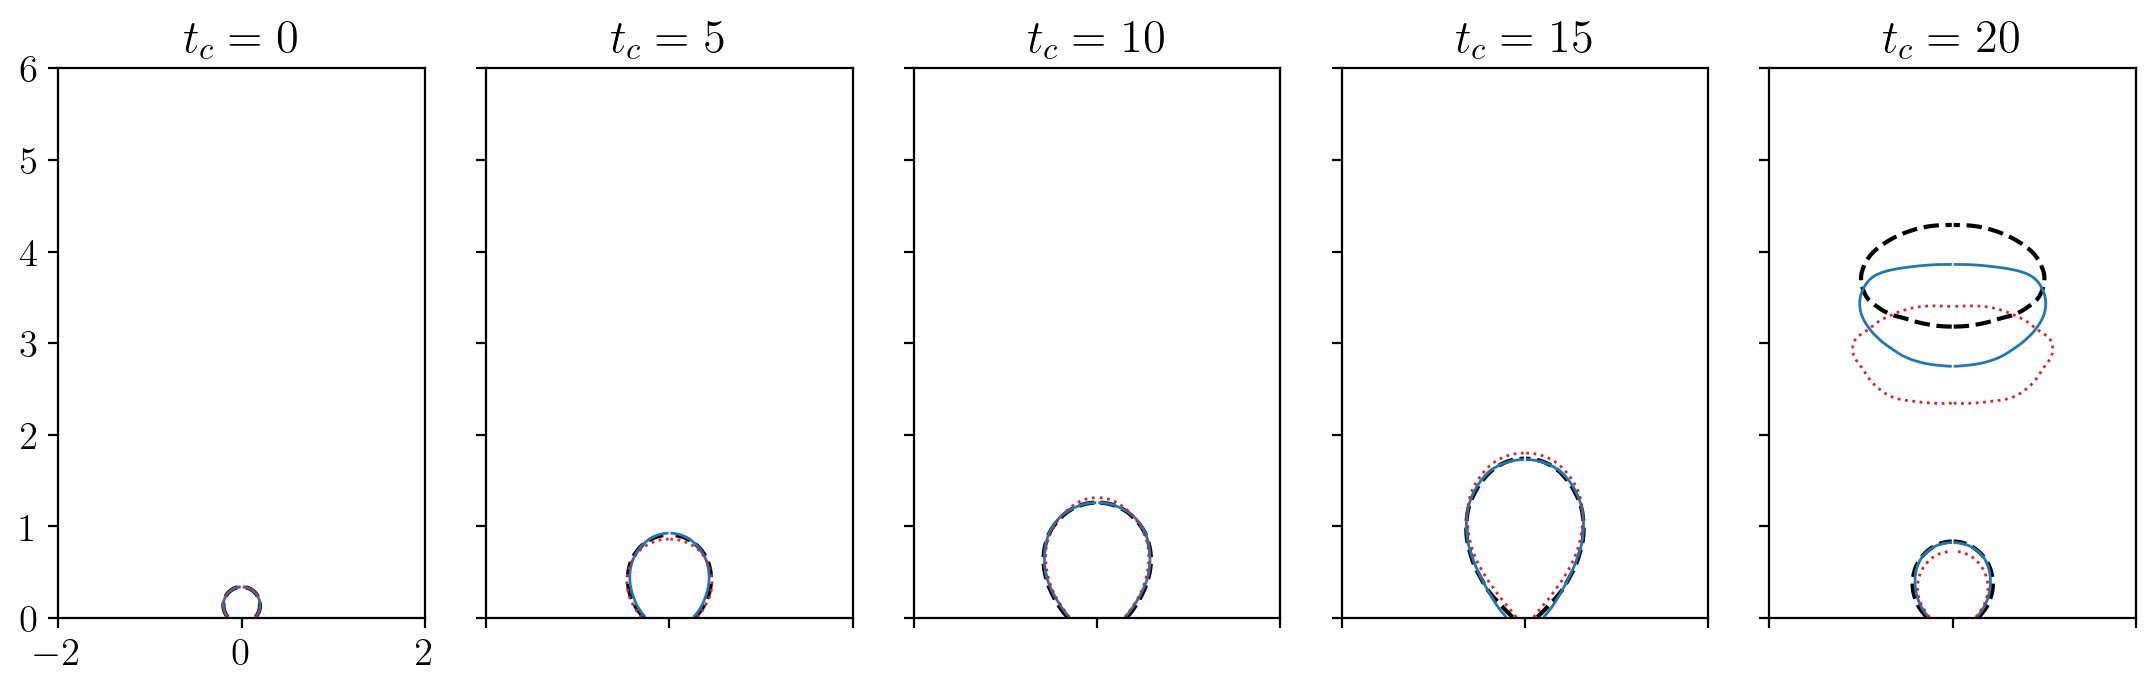

In [3]:
import boxkit
import boxkit.resources.flash as flash_box

pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

FileIndex = [*range(5)]
Figure, PlotList = pyplot.subplots(1, len(FileIndex), figsize=(11,5), dpi=200)

for Plot, Index in zip(PlotList,FileIndex):

    Linestyles = itertools.cycle(("--","-", ":"))
    Colors = itertools.cycle(("black","tab:blue","tab:red"))
    Linewidths = itertools.cycle((1.5,1,1))

    
    #Linestyles = itertools.cycle(("-", "--"))
    #Colors = itertools.cycle(("tab:blue","black"))
    #Linewidths = itertools.cycle((1,1))

    for key in Datasets:
        Merged = boxkit.mergeblocks(Datasets[key][Index], ["dfun"])
        Merged.fill_guard_cells()
        flash_box.lset_plot_contour_2d(Plot, Merged, 
                                       linestyles=next(Linestyles), 
                                       linewidths=next(Linewidths), 
                                       colors=next(Colors),xmirror=True) 

    time = Datasets[key][Index].time
    Plot.set_title(rf"$t_c = {int(time)}$")
    Plot.set_aspect('equal')
    Plot.set_xlim([-2,2])
    Plot.set_ylim([0,6])
    if Index != 0:
        Plot.xaxis.set_tick_params(labelbottom=False)
        Plot.yaxis.set_tick_params(labelbottom=False)

#pyplot.axis('equal')
pyplot.savefig("/Users/Akash/Desktop/fig_grid_bubble.png")
pyplot.tight_layout()
pyplot.show()

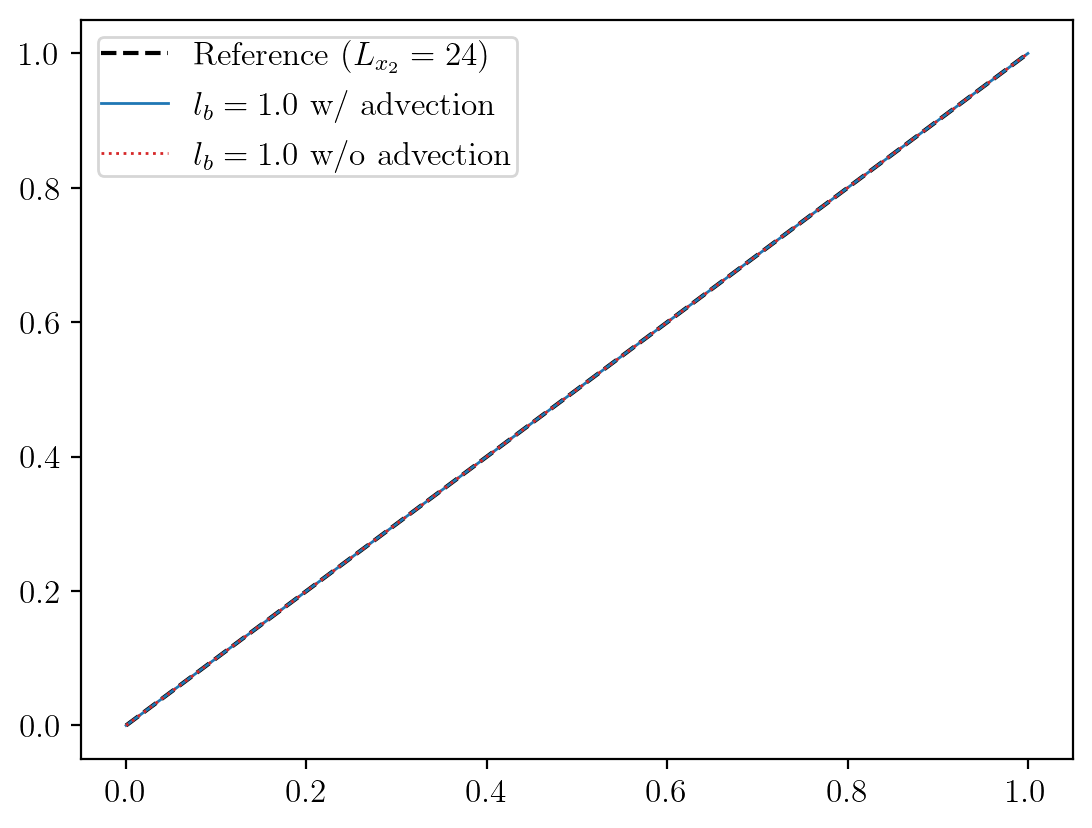

In [4]:
pyplot.rc("font", family="serif", size=12, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)
Linestyles = itertools.cycle(("--","-", ":"))
Colors = itertools.cycle(("black","tab:blue","tab:red"))
Linewidths = itertools.cycle((1.5,1,1))

pyplot.figure(dpi=200)
for i in range(3):
    pyplot.plot(numpy.linspace(0,1,10),numpy.linspace(0,1,10),linestyle=next(Linestyles),linewidth=next(Linewidths),color=next(Colors))
    
pyplot.legend([r"Reference ($L_{x_2} = 24$)", r"$l_b=1.0$ w/ advection", r"$l_b=1.0$ w/o advection"],borderpad=0.1)